### Natural Language Processing

*Adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker, [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky, Kevin Markham's Data School Curriculum*

In [1]:
import glob
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

from nltk.corpus import stopwords
from string import punctuation
from spacy.en import English
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus

C:\Users\Pedro\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Pedro\Anaconda2\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from sklearn.cross_validation import train_test_split

In [18]:
#Combining CSV Files
#C:\Users\Pedro\Documents\nlpsideproject\data
fout=open("compiled_master.csv","a") #remember to change this number
# first file:
for line in open("C:/Users/Pedro/Documents/nlpsideproject/Compiled_Folders/compiled0.csv"):
    fout.write(line)
# now the rest:    
for num in range(1,11):
    f = open("C:/Users/Pedro/Documents/nlpsideproject/Compiled_Folders/compiled"+str(num)+".csv")
    f.next() # skip the header
    for line in f:
         fout.write(line)
    f.close() # not really needed
fout.close()

In [19]:
url = 'C:/Users/Pedro/Documents/nlpsideproject/compiled_master.csv'

In [20]:
yelp = pd.read_csv(url)

In [21]:
yelp.head()

,rest_name,username,review,stars,date,location
0,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,This review is massively overdue (I don't writ...,5.0,8/25/2017,"Washington, DC"
1,La Jambe,/user_details?userid=X3Ki2Z6JTn9gbuz23NO3kg,My friends and I were looking for a good happy...,4.0,9/25/2017,"Washington, DC"
2,La Jambe,/user_details?userid=dOYJX2FBw5FXDBwXZZoq7A,Elegant and intimate - La Jambe has an unexpec...,4.0,8/11/2017,"Washington, DC"
3,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,This place is really special. If your in the a...,5.0,7/23/2017,"Red Bank, NJ"
4,La Jambe,/user_details?userid=mz8Q8yEOkgjaISIqzUSHLg,Hooray for happy hour! $5 for delicious wines?...,4.0,7/10/2017,"Washington, DC"


In [32]:
yelp.tail()

,rest_name,username,review,stars,date,location
4910,Bistrot Lepic & Wine Bar,/user_details?userid=vNRe0RRTlY4j81emCo-ing,"Great atmosphere, the main entree food was fab...",5.0,2010-02-22,"Arlington, VA"
4911,Bistrot Lepic & Wine Bar,/user_details?userid=BLGacZ-LtaiJUZ4xmB1EDg,What a rip off!!! We went for Christmas dinner...,2.0,2009-01-09,"Washington, DC"
4912,Bistrot Lepic & Wine Bar,/user_details?userid=23tTzYqjrP4IhtvLupfp7w,Loved it! Came here recently on a second trip...,5.0,2009-07-30,"Washington, DC"
4913,Bistrot Lepic & Wine Bar,/user_details?userid=VlI1CxW1VawvH_vv7t2mEg,I have been to Bistro Lepic quite a few times ...,1.0,2013-06-03,"Georgetown, Washington, DC"
4914,Bistrot Lepic & Wine Bar,/user_details?userid=Fc1HSIgVqlXyvYkUV7yvsg,I took my boyfriend here recently for his birt...,4.0,2009-01-27,"Rockville, MD"


In [22]:
#creating the dataframe
yelp_best_worst = []

In [23]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [26]:
# read yelp.csv into a DataFrame
url = 'C:/Users/Pedro/Documents/nlpsideproject/compiled_master.csv'
yelp = pd.read_csv(url)

# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = yelp_best_worst.review
y = yelp_best_worst.stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
yelp_best_worst.ix[0].review

"This review is massively overdue (I don't write a lot of reviews). My husband and I are semi-regulars at this place. Anastasia and Dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar. The wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure. Anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation.\r\n\r\nThe food is yummy too, if you're okay with the dishes being a bit on the small side for the price.\r\n\r\nOverall, this place has us coming back on the regular. The only downside is they've been so successful that it's rarer to see Anastasia and Dave hanging around these days, but that just means they've been doing well. \r\n\r\nA must-try if you live in the U Street/Shaw/Mt. Vernon area.\r\n"

In [28]:
# define X and y
X = yelp_best_worst.review
y = yelp_best_worst.stars

In [29]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
print len(X_train)
print len(X_test)

1546
516


# Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [33]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [34]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(1546, 9073)

In [35]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'yelps', u'yep', u'yes', u'yesil', u'yesterday', u'yet', u'yogurt', u'yokel', u'yonni', u'yor', u'york', u'yotch', u'you', u'young', u'younger', u'youngest', u'youngins', u'your', u'yours', u'yourself', u'youthful', u'yquem', u'yr', u'yuca', u'yucca', u'yukon', u'yum', u'yummmm', u'yummy', u'yuppie', u'zabaglione', u'zach', u'zachary', u'zack', u'zaytinha', u'zaytinya', u'zen', u'zero', u'zinfandel', u'zinger', u'zone', u'zoo', u'zucchini', u'zucchinis', u'zutan', u'zutant', u'\xe1ine', u'\xe9tait', u'\xfcber', u'\u0131zgara']


In [36]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [37]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(1546, 10923)

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [38]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(1546, 84596)

In [39]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'zaytinha', u'zaytinha and', u'zaytinya', u'zaytinya and', u'zaytinya eating', u'zaytinya the', u'zen', u'zen moment', u'zero', u'zero and', u'zero apologies', u'zero complaints', u'zero frequent', u'zero hassle', u'zero stars', u'zinfandel', u'zinfandel newbies', u'zinger', u'zinger of', u'zone', u'zone and', u'zone we', u'zoo', u'zoo anytime', u'zoo deal', u'zucchini', u'zucchini and', u'zucchini cake', u'zucchini fritters', u'zucchini meatball', u'zucchini mix', u'zucchini pancakes', u'zucchini patties', u'zucchini thing', u'zucchinis', u'zucchinis green', u'zutan', u'zutan they', u'zutant', u'zutant and', u'zutant they', u'\xe1ine', u'\xe1ine described', u'\xe1ine suggested', u'\xe9tait', u'\xe9tait incroyable', u'\xfcber', u'\xfcber cool', u'\u0131zgara', u'\u0131zgara k\xf6fte']


**Predicting the star rating:**

In [40]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes  to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.924418604651


In [41]:
# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.82751937984496127

In [42]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print 'Features: ', X_train_dtm.shape[1]
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

In [43]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  84596
Accuracy:  0.848837209302


# Part 3 - Stop Word Removals

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [44]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [45]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  8792
Accuracy:  0.922480620155


In [46]:
# set of stop words
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'nei

## Other Vectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [47]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.90503875969


In [48]:
# all 100 features
print vect.get_feature_names()

[u'absolutely', u'amazing', u'area', u'asked', u'atmosphere', u'bar', u'barcelona', u'best', u'better', u'bit', u'bread', u'brunch', u'came', u'cheese', u'come', u'course', u'day', u'dc', u'definitely', u'delicious', u'dessert', u'did', u'didn', u'dinner', u'dish', u'dishes', u'don', u'drink', u'drinks', u'enjoyed', u'excellent', u'experience', u'fantastic', u'favorite', u'food', u'friend', u'friendly', u'friends', u'glass', u'going', u'good', u'got', u'great', u'happy', u'highly', u'hour', u'just', u'know', u'like', u'list', u'little', u'love', u'loved', u'make', u'manager', u'meal', u'menu', u'new', u'nice', u'night', u'order', u'ordered', u'outside', u'patio', u'people', u'perfect', u'place', u'plate', u'plates', u'proof', u'really', u'recommend', u'reservation', u'restaurant', u'right', u'sauce', u'say', u'selection', u'server', u'service', u'small', u'spot', u'staff', u'steak', u'table', u'tapas', u'think', u'time', u'times', u'tried', u'try', u've', u'wait', u'waiter', u'want', u

In [49]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  84596
Accuracy:  0.848837209302



min_df: float in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts

In [50]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  24410
Accuracy:  0.936046511628


Introduction to TextBlob

In [51]:
# print the first review
print yelp_best_worst.review[50]

Both me and my friend were charged higher tips on our credit cards then we signed on our receipts. 

Update: La Jambe remedied the situation in a thoughtful and professional manner.



In [52]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.review[0])

In [53]:
# list the words
review.words

WordList(['This', 'review', 'is', 'massively', 'overdue', 'I', 'do', "n't", 'write', 'a', 'lot', 'of', 'reviews', 'My', 'husband', 'and', 'I', 'are', 'semi-regulars', 'at', 'this', 'place', 'Anastasia', 'and', 'Dave', 'are', 'friendly', 'people', 'with', 'great', 'taste', 'and', 'they', 'have', 'created', 'wonderful', 'unpretentious', 'wine', 'bar', 'The', 'wine', 'list', 'is', 'delicious', 'we', 'have', 'our', 'favorites', 'like', 'everyone', 'but', 'have', 'never', 'had', 'a', 'bad', 'wine', 'from', 'their', 'list', 'and', 'the', 'staff', 'give', 'great', 'advice', 'if', 'you', "'re", 'not', 'sure', 'Anastasia', 'even', 'gave', 'us', 'recommendations', 'about', 'which', 'wineries', 'to', 'hit', 'up', 'in', 'her', 'native', 'land', 'on', 'our', 'summer', 'vacation', 'The', 'food', 'is', 'yummy', 'too', 'if', 'you', "'re", 'okay', 'with', 'the', 'dishes', 'being', 'a', 'bit', 'on', 'the', 'small', 'side', 'for', 'the', 'price', 'Overall', 'this', 'place', 'has', 'us', 'coming', 'back',

In [54]:
# list the sentences
review.sentences

[Sentence("This review is massively overdue (I don't write a lot of reviews)."),
 Sentence("My husband and I are semi-regulars at this place."),
 Sentence("Anastasia and Dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar."),
 Sentence("The wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure."),
 Sentence("Anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation."),
 Sentence("The food is yummy too, if you're okay with the dishes being a bit on the small side for the price."),
 Sentence("Overall, this place has us coming back on the regular."),
 Sentence("The only downside is they've been so successful that it's rarer to see Anastasia and Dave hanging around these days, but that just means they've been doing well."),
 Sentence("A must-try if you live in the U Street/Shaw/Mt."),
 

In [58]:
# some string methods are available
review.lower()

TextBlob("this review is massively overdue (i don't write a lot of reviews). my husband and i are semi-regulars at this place. anastasia and dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar. the wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure. anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation.

the food is yummy too, if you're okay with the dishes being a bit on the small side for the price.

overall, this place has us coming back on the regular. the only downside is they've been so successful that it's rarer to see anastasia and dave hanging around these days, but that just means they've been doing well. 

a must-try if you live in the u street/shaw/mt. vernon area.
")

# Part 6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [59]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print [stemmer.stem(word) for word in review.words]

[u'this', u'review', u'is', u'massiv', u'overdu', u'i', u'do', u"n't", u'write', u'a', u'lot', u'of', u'review', u'my', u'husband', u'and', u'i', u'are', u'semi-regular', u'at', u'this', u'place', u'anastasia', u'and', u'dave', u'are', u'friend', u'peopl', u'with', u'great', u'tast', u'and', u'they', u'have', u'creat', u'wonder', u'unpretenti', u'wine', u'bar', u'the', u'wine', u'list', u'is', u'delici', u'we', u'have', u'our', u'favorit', u'like', u'everyon', u'but', u'have', u'never', u'had', u'a', u'bad', u'wine', u'from', u'their', u'list', u'and', u'the', u'staff', u'give', u'great', u'advic', u'if', u'you', u're', u'not', u'sure', u'anastasia', u'even', u'gave', u'us', u'recommend', u'about', u'which', u'wineri', u'to', u'hit', u'up', u'in', u'her', u'nativ', u'land', u'on', u'our', u'summer', u'vacat', u'the', u'food', u'is', u'yummi', u'too', u'if', u'you', u're', u'okay', u'with', u'the', u'dish', u'be', u'a', u'bit', u'on', u'the', u'small', u'side', u'for', u'the', u'price',

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [60]:
# assume every word is a noun
print [word.lemmatize() for word in review.words]

['This', 'review', 'is', 'massively', 'overdue', 'I', 'do', "n't", 'write', 'a', 'lot', 'of', u'review', 'My', 'husband', 'and', 'I', 'are', 'semi-regulars', 'at', 'this', 'place', 'Anastasia', 'and', 'Dave', 'are', 'friendly', 'people', 'with', 'great', 'taste', 'and', 'they', 'have', 'created', 'wonderful', 'unpretentious', 'wine', 'bar', 'The', 'wine', 'list', 'is', 'delicious', 'we', 'have', 'our', u'favorite', 'like', 'everyone', 'but', 'have', 'never', 'had', 'a', 'bad', 'wine', 'from', 'their', 'list', 'and', 'the', 'staff', 'give', 'great', 'advice', 'if', 'you', "'re", 'not', 'sure', 'Anastasia', 'even', 'gave', u'u', u'recommendation', 'about', 'which', u'winery', 'to', 'hit', 'up', 'in', 'her', 'native', 'land', 'on', 'our', 'summer', 'vacation', 'The', 'food', 'is', 'yummy', 'too', 'if', 'you', "'re", 'okay', 'with', 'the', u'dish', 'being', 'a', 'bit', 'on', 'the', 'small', 'side', 'for', 'the', 'price', 'Overall', 'this', 'place', u'ha', u'u', 'coming', 'back', 'on', 'the

In [61]:
# assume every word is a verb
print [word.lemmatize(pos='v') for word in review.words]

['This', 'review', u'be', 'massively', 'overdue', 'I', 'do', "n't", 'write', 'a', 'lot', 'of', u'review', 'My', 'husband', 'and', 'I', u'be', 'semi-regulars', 'at', 'this', 'place', 'Anastasia', 'and', 'Dave', u'be', 'friendly', 'people', 'with', 'great', 'taste', 'and', 'they', 'have', u'create', 'wonderful', 'unpretentious', 'wine', 'bar', 'The', 'wine', 'list', u'be', 'delicious', 'we', 'have', 'our', 'favorites', 'like', 'everyone', 'but', 'have', 'never', u'have', 'a', 'bad', 'wine', 'from', 'their', 'list', 'and', 'the', 'staff', 'give', 'great', 'advice', 'if', 'you', "'re", 'not', 'sure', 'Anastasia', 'even', u'give', 'us', 'recommendations', 'about', 'which', 'wineries', 'to', 'hit', 'up', 'in', 'her', 'native', 'land', 'on', 'our', 'summer', 'vacation', 'The', 'food', u'be', 'yummy', 'too', 'if', 'you', "'re", 'okay', 'with', 'the', u'dish', u'be', 'a', u'bite', 'on', 'the', 'small', 'side', 'for', 'the', 'price', 'Overall', 'this', 'place', u'have', 'us', u'come', 'back', 'o

In [62]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [63]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  8897
Accuracy:  0.922480620155


In [64]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'yelper', u'yelpers', u'yep', u'yes', u'yesil', u'yesterday', u'yet', u'yogurt', u'yogurt-cilantro', u'yogurt/herbal/olive', u'yokel', u'yonni', u'yor', u'york', u'you', u"you'r", u'young', u'younger', u'youngest', u'youngins', u'your', u'yours', u'yourself', u'youthful', u'yr', u'yuca', u'yucca', u'yukon', u'yum', u'yummmm', u'yummy', u'yuppie', u'zabaglione', u'zach', u'zachary', u'zack', u'zaytinha', u'zaytinya', u'zen', u'zero', u'zinfandel', u'zinger', u'zone', u'zoo', u'zucchini', u'zutan', u'zutant', u'\xe1ine', u'\xfcber', u'\u0131zgara']


# Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)¶

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [65]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.review)
features = vect.get_feature_names()
dtm.shape

(4915, 15903)

In [66]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = unicode(yelp.review[review_id], 'utf-8')
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [69]:
summarize()

TOP SCORING WORDS:
staff
explained
rude
routes
instructed

RANDOM WORDS:
seven
bottle
instead
rude
share

Rude and pretentious! Go elsewhere in Chinatown.  I recommend Poste around the corner

After a couple negative experiences, it's time to write a review.  Upon arriving I explained to the hostess that we would be a group of seven and asked if we could get a table.  The staff explained to me that we could only sit if everyone ordered an entree.  Okay, I get the rule.  Most of our group wanted to eat, a couple only wanted to share appetizers.  We had already ordered a bottle of wine and were ready to order more, but we couldn't fit more food or drinks or 7 at a pub table.  Nope.  Still won't seat us.  Not only do I find the policy short-sighted since we were still going to end our time with a extent check, but half the tables were empty!!  That and the very rude behavior of the staff left us feeling very unwelcome.  Several staff told us we were "in there way" and that we should move.

**More details:** [TF-IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

# Sentiment Analysis

In [70]:
print review

This review is massively overdue (I don't write a lot of reviews). My husband and I are semi-regulars at this place. Anastasia and Dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar. The wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure. Anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation.

The food is yummy too, if you're okay with the dishes being a bit on the small side for the price.

Overall, this place has us coming back on the regular. The only downside is they've been so successful that it's rarer to see Anastasia and Dave hanging around these days, but that just means they've been doing well. 

A must-try if you live in the U Street/Shaw/Mt. Vernon area.



In [71]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.2600852272727273

In [72]:
# understanding the apply method
yelp['length'] = yelp.review.apply(len)
yelp.head(10)

,rest_name,username,review,stars,date,location,length
0,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,This review is massively overdue (I don't writ...,5.0,8/25/2017,"Washington, DC",897
1,La Jambe,/user_details?userid=X3Ki2Z6JTn9gbuz23NO3kg,My friends and I were looking for a good happy...,4.0,9/25/2017,"Washington, DC",851
2,La Jambe,/user_details?userid=dOYJX2FBw5FXDBwXZZoq7A,Elegant and intimate - La Jambe has an unexpec...,4.0,8/11/2017,"Washington, DC",699
3,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,This place is really special. If your in the a...,5.0,7/23/2017,"Red Bank, NJ",531
4,La Jambe,/user_details?userid=mz8Q8yEOkgjaISIqzUSHLg,Hooray for happy hour! $5 for delicious wines?...,4.0,7/10/2017,"Washington, DC",544
5,La Jambe,/user_details?userid=B1U0NiIcCltvuBXd8NbtuQ,$5 happy hour wines at the corner gem La Jambe...,4.0,6/5/2017,"Washington, DC",436
6,La Jambe,/user_details?userid=W7R6U1ibcHxXBYedVWYQqw,This little gem is a fantastic place for happy...,5.0,6/23/2017,"Berkeley, CA",379
7,La Jambe,/user_details?userid=oe0t5jdk-WHCYqnkRB_reg,Best wine bar happy hour in the Shaw area! A f...,5.0,12/30/2016,"Washington, DC",1260
8,La Jambe,/user_details?userid=XuYkUMWvzcUQa8TOuPbtAQ,Asked the owner's husband for a recommendation...,2.0,8/17/2017,"Washington D.C., DC",240
9,La Jambe,/user_details?userid=USCP83O8bpVpFPCwXG-OKQ,Great crepes at brunch! The mimosas were espec...,4.0,8/17/2017,"Atlanta, GA",103


In [73]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [74]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['sentiment'] = yelp.review.apply(detect_sentiment)

In [75]:
yelp.columns

Index([u'rest_name', u'username', u'review', u'stars', u'date', u'location',
       u'length', u'sentiment'],
      dtype='object')

In [76]:
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

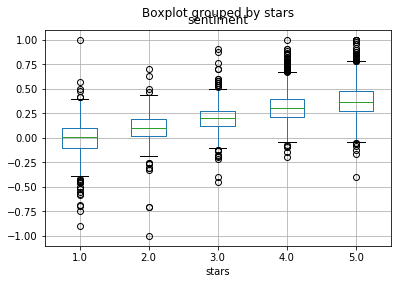

In [77]:
# box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [56]:
# reviews with most positive sentiment
yelp[yelp.sentiment == 1].review.head()

Series([], Name: review, dtype: object)

In [57]:
# reviews with most negative sentiment
yelp[yelp.sentiment == -1].review.head()

Series([], Name: review, dtype: object)

## Conclusion

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible